In [1]:
# coding = utf-8
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_train = pd.read_csv('/Users/fengjianting/Desktop/Predict/DATA/40MW/train_40mw.csv')

In [3]:
data_train

,Time,Radioactivity,WindSpeed,WindDirection,Temperature,Pressure,Humidity,ActualPower
0,2017/08/01 10:00:00,-0.863544,-0.917355,202,0.512500,0.071429,0.782609,3.698670
1,2017/08/01 10:15:00,-0.843177,-0.933884,207,0.516667,0.071429,0.760870,3.532330
2,2017/08/01 10:30:00,-0.812627,-0.933884,214,0.520833,0.071429,0.739130,2.944670
3,2017/08/01 10:45:00,-0.782077,-0.950413,225,0.525000,0.071429,0.717391,2.526670
4,2017/08/01 11:00:00,-0.751527,-0.966942,207,0.529167,0.071429,0.717391,2.781670
5,2017/08/01 11:15:00,-0.718941,-0.966942,207,0.533333,0.071429,0.695652,5.093330
6,2017/08/01 11:30:00,-0.684318,-0.966942,180,0.537500,0.071429,0.673913,5.963000
7,2017/08/01 11:45:00,-0.649695,-0.950413,135,0.541667,0.071429,0.673913,4.341330
8,2017/08/01 12:00:00,-0.615071,-0.933884,135,0.550000,0.071429,0.652174,5.498330
9,2017/08/01 12:15:00,-0.596741,-0.900826,135,0.554167,0.071429,0.630435,8.552330


In [4]:
data_train.describe()

,Radioactivity,WindSpeed,WindDirection,Temperature,Pressure,Humidity,ActualPower
count,29792.000000,29792.000000,29792.000000,29792.000000,29792.000000,29792.000000,29792.000000
mean,-0.620221,-0.513244,187.436997,0.190794,0.016363,0.032782,7.082964
std,0.523733,0.327519,96.706403,0.425173,0.360050,0.492392,10.942558
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.397667
25%,-1.000000,-0.768595,115.000000,-0.162500,-0.214286,-0.369565,-0.105000
50%,-0.969450,-0.570248,138.000000,0.245833,0.000000,0.043478,0.000000
75%,-0.297352,-0.338843,298.000000,0.541667,0.285714,0.413043,11.989500
max,1.000000,1.000000,359.000000,1.000000,1.000000,1.000000,39.756700


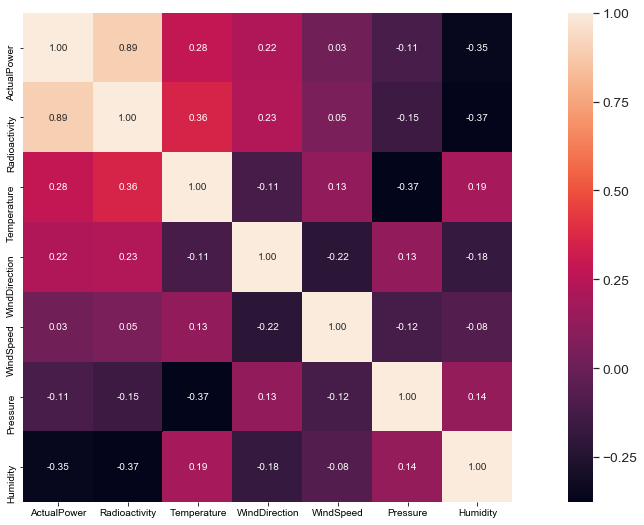

In [5]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
k  = 7 # 关系矩阵中将显示7个特征
cols = corrmat.nlargest(k, 'ActualPower')['ActualPower'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

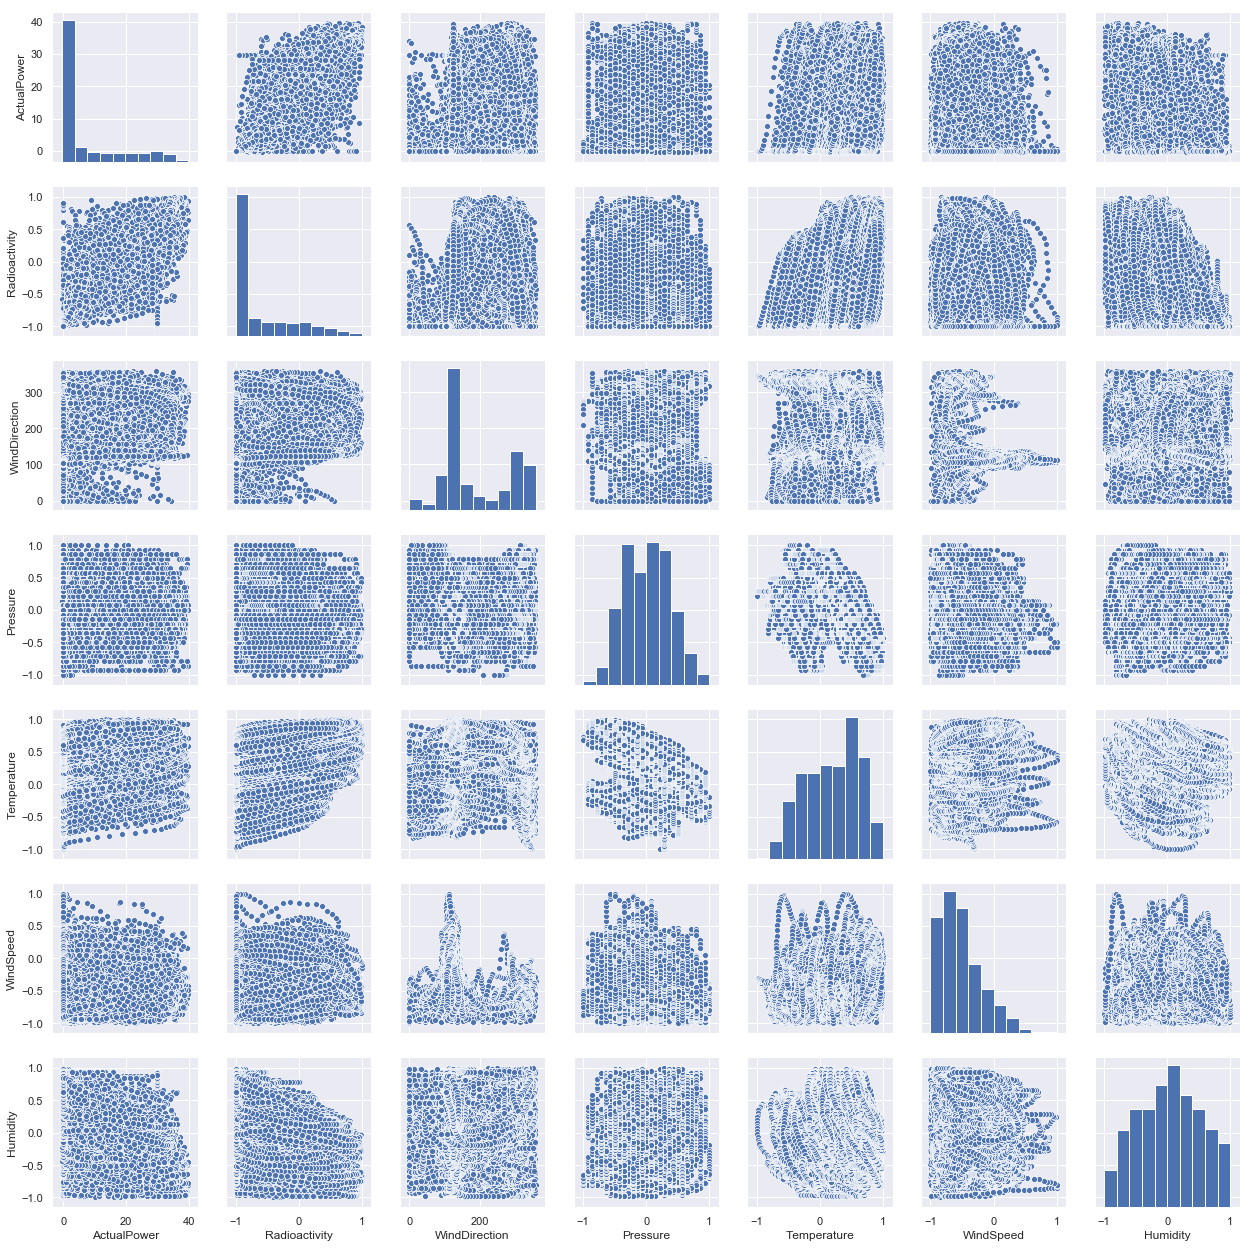

In [6]:
sns.set()
cols = ['ActualPower','Radioactivity','WindDirection','Pressure','Temperature', 'WindSpeed','Humidity']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()